<a href="https://colab.research.google.com/github/skarot/DeepLearning/blob/main/CustomerChurnPredictionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

## Import Libraries

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load dataset

In [7]:
pwd

'/'

In [8]:
cd ..

/


Dataset downloaded from 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'

In [9]:
df = pd.read_csv('content/Telco-Customer-Churn.csv')

## EDA

In [10]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


CustomerId doesnot make any sense or add value do we can drop it

In [11]:
df.drop(columns = ['customerID'], inplace = True)

In [12]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df['MonthlyCharges'].loc[:5]

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
5    99.65
Name: MonthlyCharges, dtype: float64

In [15]:
df['TotalCharges'].loc[:5]

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
Name: TotalCharges, dtype: object

Monthly charges are float while total charges are object. We need to convert it to float.

error = 'coerce' will convert any invalid charecter to Nan

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

Check for null

In [17]:
nullcheck = df['TotalCharges'].isnull()

Find all rows that have TotalCharges as null

In [18]:
df[df['TotalCharges'].isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
len(df[df['TotalCharges'].isnull()])

11

There are 11 rows with total charges as empty or Nan. in record size of 7000plus, 11 reows can be deleted, as it doesnot make much difference.

In [20]:
total_charges_null = df[df['TotalCharges'].isnull()]

In [21]:
total_charges_null.index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [22]:
df1 = df.drop(index= total_charges_null.index, axis = 0)

In [23]:
df1.shape

(7032, 20)

Count of records reduced from 7043 to 7032, i.e by 11

So far we removed customerId column and null TotalCharges entries.

Next lets find all the unique values for each column entires so that they can be scaled later.

In [24]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
for column in df.columns:
  print(f'{column}:{df[column].unique()}')


gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.

Column 'MultipleLines' has extra category other than 'yes' and 'no', which can be replaced as 'no'. Same holds true for 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV' and 'StreamingMovies'

## Preprocessing

In [26]:
df1['MultipleLines'].replace({'No phone service':'No'},inplace = True)

In [27]:
for column in df1.columns:
  print(f'{column}:{df1[column].unique()}')


gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45 

In [28]:
df1.replace({'OnlineSecurity':'No internet service',
             'OnlineBackup':'No internet service',
             'DeviceProtection':'No internet service',
             'TechSupport':'No internet service',
             'StreamingTV':'No internet service',
             'StreamingMovies':'No internet service'},value='No', inplace=True)

In [29]:
for column in df1.columns:
  print(f'{column}:{df1[column].unique()}')


gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


Now we see most of the columns are categorical 'yes or no' column values. But the column 'InternetService','Contract' and 'PaymentMethod' have more than 2 nunique values.
We will use one hot encoding for these using pandas get_dummy menthod.

In [30]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

Similarly we can convert all yes no values to 1 and 0 for rest of the categorical column

In [31]:
len(df1['gender'].unique())

2

In [32]:
for col in df2.columns:
  if len(df2[col].unique()) == 2:
    df2[col].replace({'Yes':1,'No':0},inplace= True)

In [33]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,Female,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,Female,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


We do the same for gender column

In [34]:
df2['gender'].replace({'Male':0,'Female':1},inplace = True)

In [35]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [36]:
for column in df1.columns:
  print(f'{column}:{df1[column].unique()}')


gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


Now we see all columns are 0 and 1 except tenure,monthlyCharge and totalCharge. 
We will scale these values between 1 and 2 using sklearn's minmaxscaler

In [37]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [39]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


## Training set and Test set preparation

Select X and y for df2

In [40]:
y = df2.iloc[:,16:17]

In [41]:
df3 = df2.drop(columns = ['Churn'])

In [42]:
df3.shape

(7032, 26)

In [43]:
X = df3

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)

In [45]:
X_train.shape

(4922, 26)

In [46]:
y_train

,Churn
3483,0
4754,0
6145,0
2202,1
3822,0
...,...
6026,0
710,1
2492,1
174,0


## Model Creation

In [47]:
model = keras.Sequential([
                          keras.layers.Dense(20,input_shape = (26,),activation = 'relu'),
                          keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer ='adam',loss= 'binary_crossentropy', metrics = 'accuracy')

## Training

In [48]:
model.fit(X_train, y_train,epochs = 5)

Epoch 1/5
154/154 [==============================] - 1s 2ms/step - loss: 0.5601 - accuracy: 0.7052
Epoch 2/5
154/154 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7905
Epoch 3/5
154/154 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7983
Epoch 4/5
154/154 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8023
Epoch 5/5
154/154 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8033


## Prediction

In [49]:
y_hat = model.predict(X_test)

## Evaluation

In [50]:
loss,accuracy = model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7967


## Test

Original y values

In [51]:
y_test[0:5]

,Churn
6036,0
1204,0
5717,0
1739,1
4981,1


Predicted y values

In [52]:
y_hat[0:5]

array([[0.08067676],
       [0.26448905],
       [0.05626088],
       [0.70426756],
       [0.6340727 ]], dtype=float32)

In [60]:
y_hat[0][0]

0.080676764

Any value above0.5 can be considered as 1 and below 0.5 as 0

In [62]:
y_pred =[]
for i in range(len(y_hat)):
  if y_hat[i][0]>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred

## Reporting

We will use confusion matrix to understand the classification metrics

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)

In [76]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1374,  152],
       [ 277,  307]], dtype=int32)>

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1526
           1       0.67      0.53      0.59       584

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



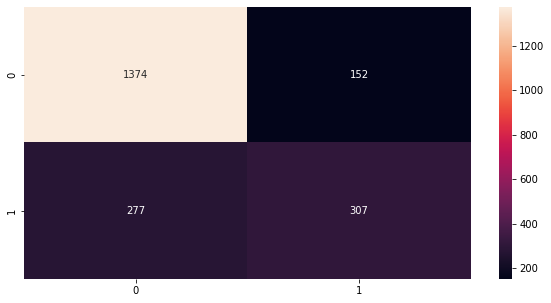

In [79]:
import seaborn as sm
plt.figure(figsize = (10,5))
plt.xlabel = 'Predicted'
plt.ylabel = 'Truth'
sm.heatmap(cm, annot=True, fmt = 'd')


*   Anything on diagonal is correct preciction.
*   Non diagonal is misclassified.
*   Accuracy = (307+1374)/ (307+1374+277+152)= 0.79
*   Precesion for Class 0 - No of correct 0 predictions/ Total 0 predictions = 1374/(1374+277) = 0.83
*   Precesion for Class 1 - No of correct 1 predictions/Total 1 predictions = 307/(307+152) = 0.67
*   Recall for Class 0 - No of correct 0 predictions/Total actual 0 class = 1374/(1374+152) = 0.9
*   Recall for Class 1 - No of correct 1 predictions/Total attual 1 class = 307/(307+277) = 0.53
*   F1 score - Harmonic means of precesion and recall = 2(precesion*recall)/(precesion+recall)



In [70]:
#Accuracy
round(((307+1374)/ (307+1374+277+152)),2)

0.8

In [81]:
# Precesion of class 0
round(1374/(1374+277),2)

0.83

In [82]:
round(307/(307+152),2)

0.67

In [83]:
round(1374/(1374+152),2)

0.9

In [84]:
round(307/(307+277),2)

0.53

In [85]:
#F1 score for class 0
2*0.83*0.9/(0.83+0.9)

0.8635838150289017

In [86]:
#F1 score for class 1
2*0.67*0.53/(0.67+0.53)

0.5918333333333333

**Precesion takes preciction as baseline**
**Recall takes Real/Truth as baseline bold text**

**True Possitive
First word (True) compares with 'reality', second word(Possitive) is what was the 'prediction'**